# 收集数据

In [1]:
import numpy as np
from pandas import DataFrame,Series
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 读取本地文件

In [2]:
#读取本地数据文件
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 下载预测数据

In [3]:
import requests
import os

In [4]:
#下载数据
if not os.path.exists('dogs_prediction'):
    os.makedirs('dogs_prediction')
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('dogs_prediction', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
#检查文件
os.listdir('dogs_prediction')

['image-predictions.tsv']

In [5]:
#读取数据
df_pred = pd.read_csv('dogs_prediction\image-predictions.tsv', sep = '\t')
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 下载twitter数据

In [6]:
#手动载入json数据
import json
file = open('tweet_json.txt', 'r')
tweet_id = []
favorite_count = []
retweet_count = []
for line in file.readlines():
    d_id = json.loads(line)['id_str']
    f_count = json.loads(line)['favorite_count']
    r_count = json.loads(line)['retweet_count']
    tweet_id.append(d_id)
    favorite_count.append(f_count)
    retweet_count.append(r_count)
file.close()
dictionary = {'tweet_id':tweet_id, 'favorite_count':favorite_count, 'retweet_count':retweet_count}
df_plus = DataFrame(data = dictionary)

In [10]:
#检查数据
df_plus.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


# 评估数据

In [9]:
#查看数据集
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#查看数据集
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [42]:
#查看数据集
df_plus

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684


In [37]:
#查看各数值类型
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
#查看各数值类型
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
#查看各数值类型
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [101]:
#查看数值分布情况
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [135]:
#查看数值分布情况
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [102]:
#查看数值分布情况
df_plus.describe()

,favorite_count,retweet_count
count,2352.000000,2352.000000
mean,8109.198980,3134.932398
std,11980.795669,5237.846296
min,0.000000,0.000000
25%,1417.000000,618.000000
50%,3596.500000,1456.500000
75%,10118.000000,3628.750000
max,132318.000000,79116.000000


In [56]:
#检查重复项
all_columns = pd.Series(list(df_archive) + list(df_pred) + list(df_plus))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [54]:
#查看重复值
df_archive[df_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [63]:
#查看分母的分布情况
df_archive['rating_denominator'].sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

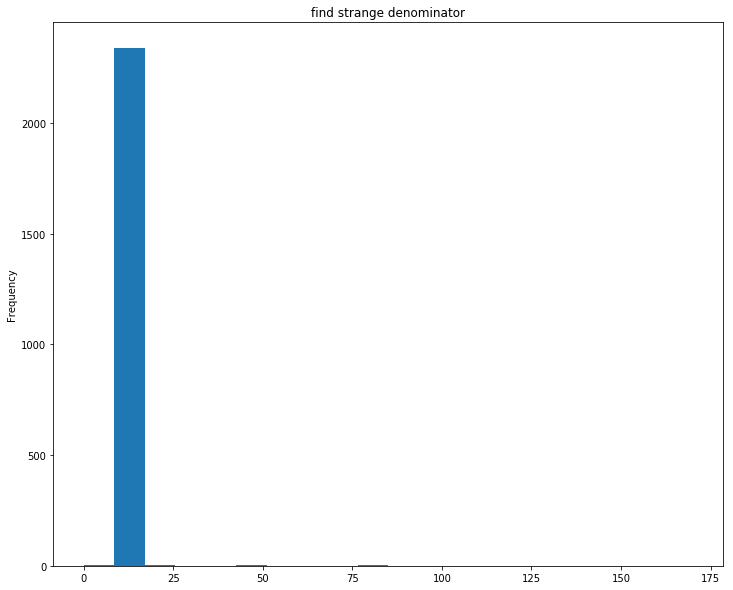

In [134]:
#可视化查看分母的分布情况
df_archive['rating_denominator'].plot(kind = 'hist',bins = 20, figsize=(12,10),title = 'find strange denominator');

In [72]:
#查看分母不等于10的异常值
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [84]:
#扩充表格长度，查看text详情
pd.set_option('max_colwidth',130)
df_archive['text'][df_archive['rating_denominator'] != 10]

313                                    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                              @docmisterio account started on 11/15/15
433                                   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttp...
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10...
902                                                        Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t...
1120            Say hello to this 

In [99]:
#回归原始长度
pd.set_option('max_colwidth',30)

In [93]:
#检查是否有重复行
df_pred[df_pred['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 质量

#### *df_archive*表格
- tweet_id为整数格式
- in_reply_*_id为浮点数
- retweeted_*_id为整数
- rating_numerator & rating_denominator列存在不少错误项，eg.0,11,15
- 存在转发的条目需要删除
- 存在无图片的推特需要删除

#### *df_pred*表格
- tweet_id为整数格式
- 列数只有2075（无法修正）

#### *df_plus*表格
- 列数只有2352（因为众所周知的原因，无法修正）

### 整洁

#### *df_archive*表格
- 狗狗们的stage使用多列展示
- 缺少分析所需字段，需要补充

# 清理数据

In [7]:
#创建数据集副本
df_archive_clean = df_archive.copy()
df_pred_clean = df_pred.copy()
df_plus_clean = df_plus.copy()

## 整洁

### *df_archive表格*

#### ---狗狗们的stage使用多列展示---

#### 定义

使用melt方法降维，将多列数据合并成一列

#### 代码

In [8]:
#melt方法降维、去重
df_archive_clean = pd.melt(df_archive_clean,id_vars = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],value_name = 'stage')
df_archive_clean = df_archive_clean.drop('variable',axis= 1)
df_archive_clean.drop_duplicates(inplace=True)
df_archive_clean.stage = df_archive_clean.stage.replace('None',np.nan)
df_stage_clean = df_archive_clean[df_archive_clean['stage'].notna()][['tweet_id','stage']]
df_archive_clean = df_archive_clean.drop('stage',axis = 1)
df_archive_clean = pd.merge(df_archive_clean, df_stage_clean, on = ['tweet_id'], how = 'left')
df_archive_clean.drop_duplicates(inplace=True)
df_archive_clean.loc[df_archive_clean.duplicated('tweet_id',keep = False),'stage'] = 'multiple'
df_archive_clean.drop_duplicates(inplace=True)

#### 测试

In [13]:
#查看去重后stage情况
df_stage_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 9 to 8151
Data columns (total 2 columns):
tweet_id    394 non-null int64
stage       394 non-null object
dtypes: int64(1), object(1)
memory usage: 9.2+ KB


In [42]:
#查看去重结果
df_archive_clean.stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: stage, dtype: int64

In [43]:
#抽样查看结果
df_archive_clean[df_archive_clean.tweet_id.duplicated(keep = False)][['tweet_id','text','stage']].sort_values(by = ['tweet_id'])

,tweet_id,text,stage


#### ---缺少分析所需字段，需要补充&存在无图片的推特需要删除---

#### 定义

使用merge方法，以tweet_id为主键inner join其他表

#### 代码

In [9]:
#并表
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(np.str) #本来应该在质量部分处理，为了并表提前进行
df_pred_clean['tweet_id'] = df_pred_clean['tweet_id'].astype(np.str)
df_master = pd.merge(df_archive_clean, df_plus_clean, on = ['tweet_id'], how = 'inner')
df_master = pd.merge(df_master, df_pred_clean, on = ['tweet_id'], how = 'inner')

#### 测试

In [10]:
#查看并表后结果
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [45]:
#检查替换后数值类型
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
stage                         321 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 no

## 质量

### *df_archive*表格 & *df_pred*表格

#### --- 多个字段格式不当---

**定义**

1. 使用.astype方法修正tweet_id、in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、img_num、favorite_count、retweet_count格式

2. .replace方法转换字段中的空值为0

**代码**

In [10]:
#填补空值
df_master['in_reply_to_status_id'] = df_master['in_reply_to_status_id'].replace(np.nan,0)
df_master['in_reply_to_user_id'] = df_master['in_reply_to_user_id'].replace(np.nan,0)
df_master['retweeted_status_id'] = df_master['retweeted_status_id'].replace(np.nan,0)
df_master['retweeted_status_user_id'] = df_master['retweeted_status_user_id'].replace(np.nan,0)
df_master['favorite_count'] = df_master['favorite_count'].replace(np.nan,0)
df_master['retweet_count'] = df_master['retweet_count'].replace(np.nan,0)
df_master['img_num'] = df_master['img_num'].replace(np.nan,0)

In [11]:
#替换数值类型
df_master['in_reply_to_status_id'] = df_master['in_reply_to_status_id'].astype('int64').astype(np.str)
df_master['in_reply_to_user_id'] = df_master['in_reply_to_user_id'].astype('int64').astype(np.str)
df_master['retweeted_status_id'] = df_master['retweeted_status_id'].astype('int64').astype(np.str)
df_master['retweeted_status_user_id'] = df_master['retweeted_status_user_id'].astype('int64').astype(np.str)
df_master['img_num'] = df_master['img_num'].astype('int64').astype(np.str)
df_master['favorite_count'] = df_master['favorite_count'].astype('int64')
df_master['retweet_count'] = df_master['retweet_count'].astype('int64')

**测试**

In [48]:
#查看数值类型
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         2073 non-null object
in_reply_to_user_id           2073 non-null object
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           2073 non-null object
retweeted_status_user_id      2073 non-null object
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
stage                         321 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                       207

In [49]:
#抽样查看整理后数值
(df_master[df_master['in_reply_to_status_id'] != '0']).sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
832,746906459439529985,746885919387574272,4196983835,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",0,0,NaN,https://twitter.com/dog_rates/status/746906459...,...,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
1379,684225744407494656,684222868335505408,4196983835,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",0,0,NaN,https://twitter.com/dog_rates/status/684225744...,...,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True
1112,705786532653883392,703255935813287936,4196983835,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",0,0,NaN,https://twitter.com/dog_rates/status/705786532...,...,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1593,675349384339542016,674999807681908736,4196983835,2015-12-11 16:20:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I lied. Here's more. All 13/10 https://t.c...,0,0,NaN,https://twitter.com/dog_rates/status/675349384...,...,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
200,844979544864018432,759099523532779520,4196983835,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,0,0,NaN,https://twitter.com/dog_rates/status/844979544...,...,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True


#### --存在转发的条目需要删除--

#### 定义

根据retweeted_status_timestamp删除转发条目

#### 代码

In [12]:
#删除转发条目
df_master = df_master[df_master['retweeted_status_timestamp'].isna()]
df_master = df_master.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

#### 测试

In [70]:
#查看删除后字段
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null object
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  

#### ---rating_numerator & rating_denominator列存在不少错误项，eg.0,11,15---

#### 定义

查阅rating_denominator列不等于10的所属行text字段发现：

多数特异值是由于同时给多只狗打分导致，少部分是由于爬取了非打分数字导致，按索引数修正方法如下：
1. 344 -> 12/10
2. 414 -> na
3. 734 -> 11/10
4. 876 -> 14/10
5. 924 -> 12/10
6. 967 -> 13/10
7. 1001 -> 11/10
8. 1022 -> 11/10
9. 1047 -> 10/10
10. 1065 -> 9/10
11. 1131 -> 12/10
12. 1207 -> 11/10
13. 1379 -> 11/10
14. 1380 -> 11/10
15. 1405 -> 10/10
16. 1512 -> 12/10
17. 1571 -> 11/10
18. 2052 -> 9/10

#### 代码

In [13]:
#确定正确的分数
pd.set_option('max_colwidth',130)
df_master['text'][df_master['rating_denominator'] != 10]

344                                   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
414     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttp...
734                                                        Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
876     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t...
924             Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
967                                                                      Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1001                This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1022                              

In [14]:
#回归原始长度
pd.set_option('max_colwidth',130)

In [15]:
#更改所有分母为10
df_master.loc[:, 'rating_denominator'] = 10

In [16]:
#更改数值
lib = [[344,12],[414,np.nan],[734,11],[876,14],[924,12],[967,13],[1001,11],[1022,11],[1047,10],[1065,9],[1131,12],[1207,11],[1379,11],[1380,11],[1405,10],[1512,12],[1571,11],[2052,9]]

def correct_col(x,y):
    df_master.loc[x, 'rating_numerator'] = y
    
for x,y in lib:
    correct_col(x,y)

#### 测试

In [20]:
#检查分母是否替换为10
df_master['rating_denominator'].describe()

count    1994.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [17]:
#查看替换后数值
for i in lib:
    print(df_master.loc[i[0],'rating_numerator'])

12.0
nan
11.0
14.0
12.0
13.0
11.0
11.0
10.0
9.0
12.0
11.0
11.0
11.0
10.0
12.0
11.0
9.0


In [18]:
#存储数据
df_master.to_csv('twitter_archive_master.csv',index = False)

# EDA

In [19]:
#查看打分分布
df_master['rating_numerator'].describe()

count    1993.000000
mean       11.693929
std        40.676751
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

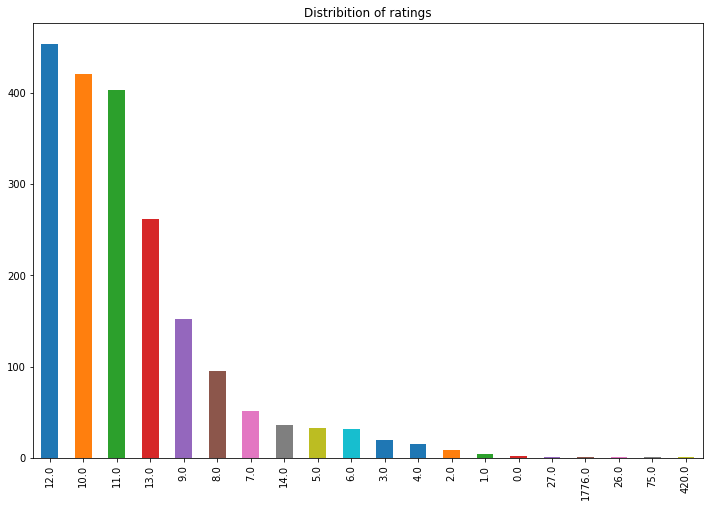

In [20]:
#打分分布可视化
df_master['rating_numerator'].value_counts().plot('bar',figsize = (12,8),title = 'Distribition of ratings');

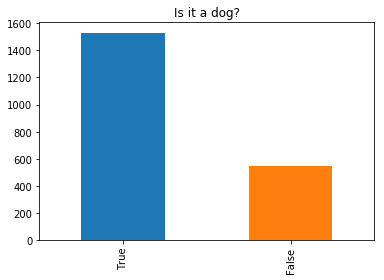

In [50]:
#上传非狗类图片的占比
df_master['p1_dog'].value_counts().plot('bar',title = 'Is it a dog?')

In [40]:
#机器学习算法预测可行度
df_master['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

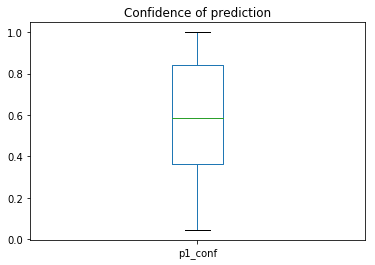

In [53]:
df_master['p1_conf'].plot('box', title='Confidence of prediction')

In [49]:
#计算相关性
df_master.corr()

,rating_numerator,rating_denominator,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
rating_numerator,1.000000,NaN,0.014882,0.014102,-0.009001,-0.013498,-0.004626
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,0.014882,NaN,1.000000,0.722359,0.071938,-0.020680,-0.050523
retweet_count,0.014102,NaN,0.722359,1.000000,0.045626,-0.009944,-0.033052
p1_conf,-0.009001,NaN,0.071938,0.045626,1.000000,-0.511298,-0.709449
p2_conf,-0.013498,NaN,-0.020680,-0.009944,-0.511298,1.000000,0.479027
p3_conf,-0.004626,NaN,-0.050523,-0.033052,-0.709449,0.479027,1.000000


## 见解
1. WeRateDogs经常打分超过10分，或许会被贴到twitter上的狗狗大都很可爱
2. 有大约25%的用户没有上传狗类照片
3. 狗狗图片识别的预测可行度有一半的样本超过50%，平均接近60%，twitter用户上传的狗狗照片在这个算法应用地不错
4. 狗狗地打分和喜欢数相关性很低，大家或许对有特点的图片更喜欢，而不是单纯的可爱~